## The goal of this XP:
- Remove background in anatomical individual image and keep the head.
- Remove background in functional individual image and keep the head.

In [1]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



In [2]:
% Set parameters
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';

# Mask anatomical backgroud 

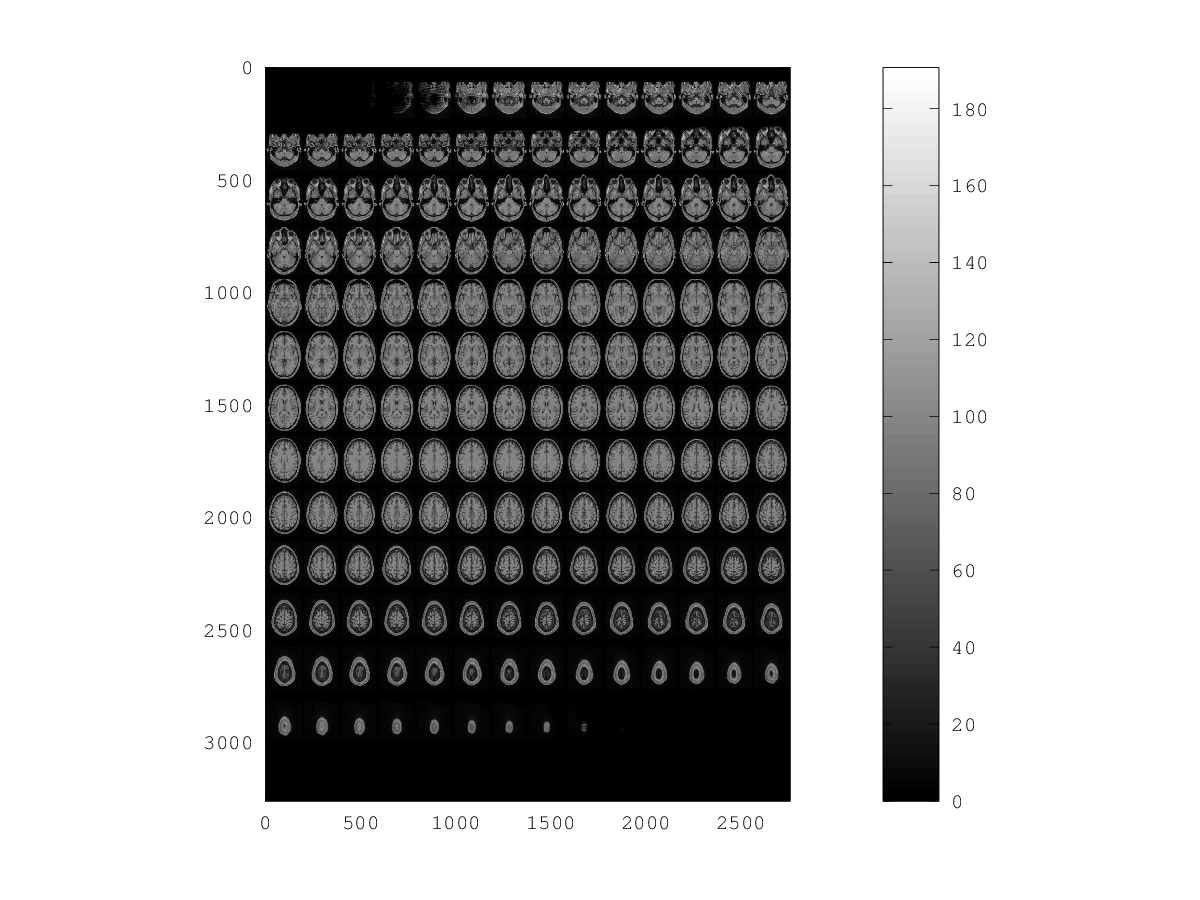

In [3]:
# mask background
niak_gb_vars
param.perc_min = 0.1;
param.perc_max = 0.98;
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl.nii.gz']);
[hdr,mask] = niak_read_vol([ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz']);
opt.type_color = 'gray';
niak_montage(vol,opt)

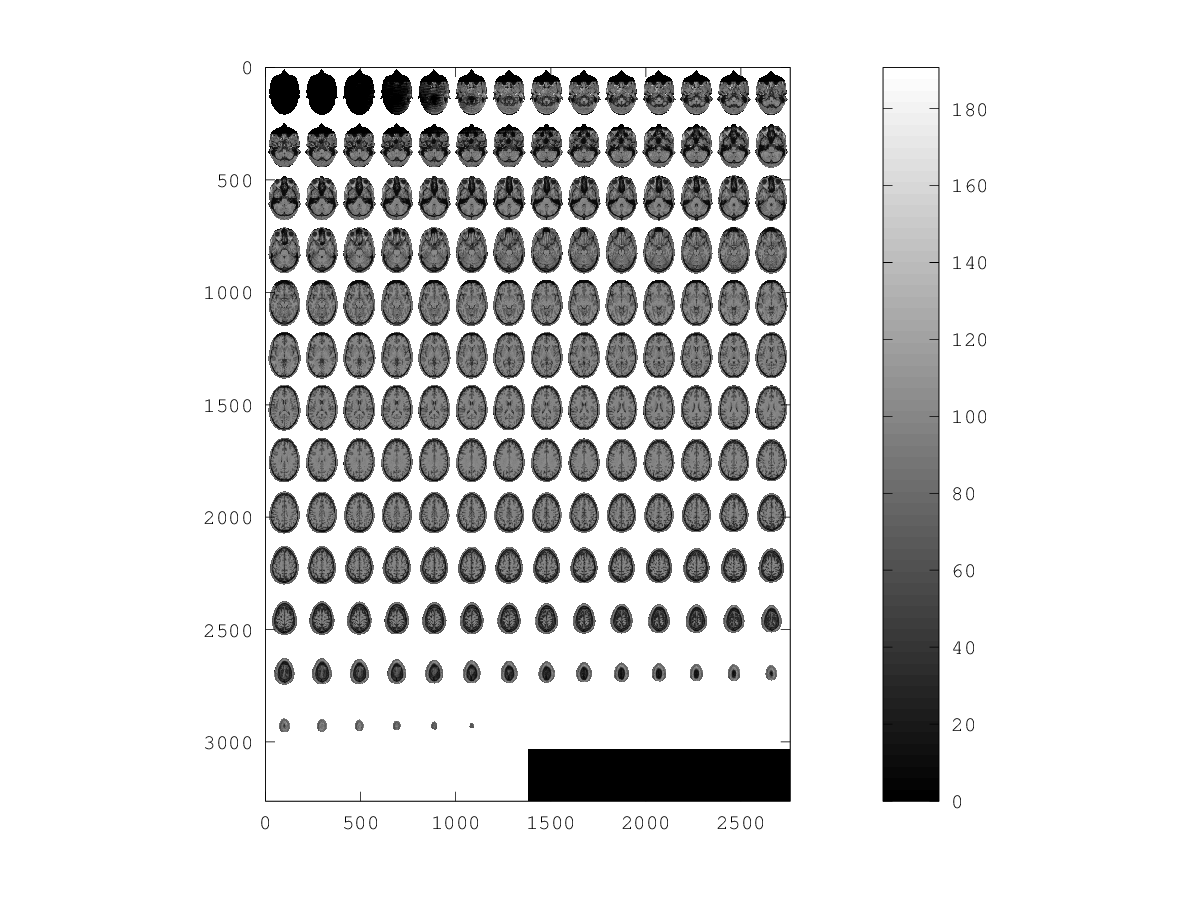

In [4]:
#mask = mask>0;
#val = sort(vol(mask),'ascend');
#vmin = val(round(param.perc_min*length(val)));
#vmax = val(round(param.perc_max*length(val)));
#vol(vol<vmin) = vmin;
#vol(vol>vmax) = vmax;
#vol(mask) = (vol(mask) - vmin)/(vmax-vmin);

vol(~mask) = max(vol(:));

opt.type_color = 'gray';
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/HC0040013/HC0040013_nuc_stereonl_white.nii.gz'];
niak_write_vol(hdr,vol);

    imformats>default_formats at line 256 column 11
    imformats at line 79 column 3
    imwrite at line 99 column 7
    niak_brick_vol2img at line 144 column 5


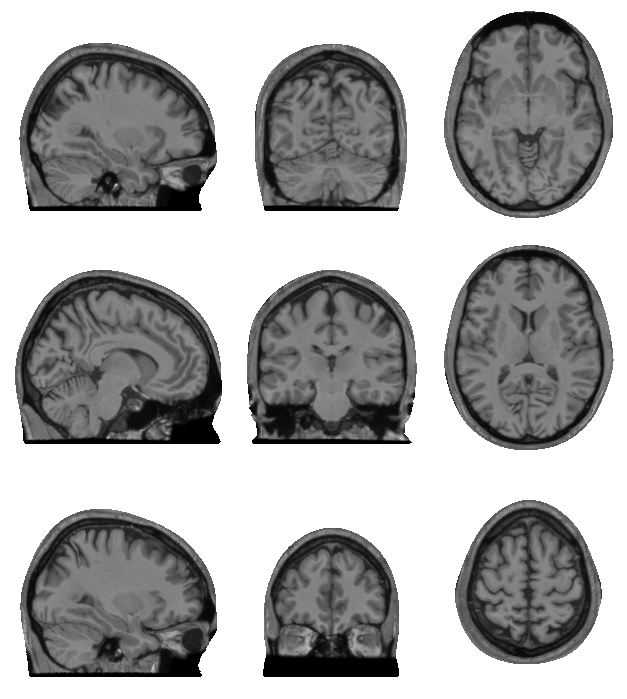

In [5]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/HC0040013/HC0040013_nuc_stereonl_white.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = Inf;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

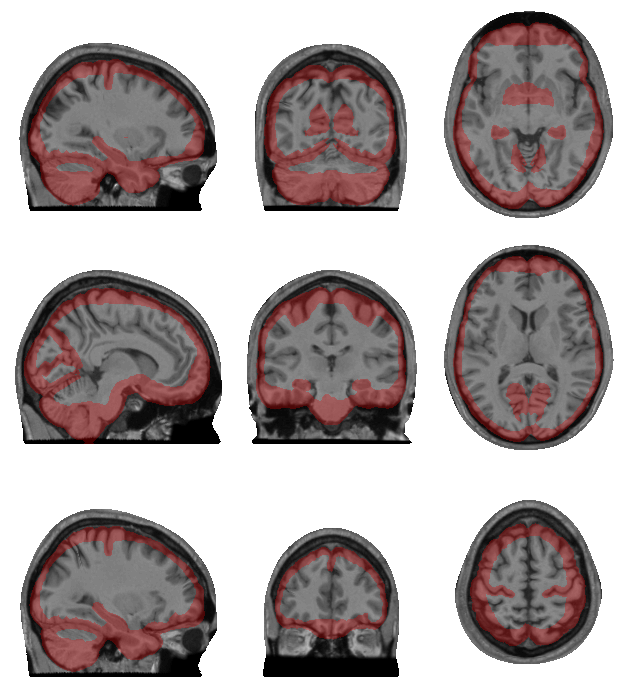

In [6]:
%% Add overlay functional-layout to anat subject 
clear jin jout jopt
param.transparency = 0.7;
jin.background =  [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white_func_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

# Mask Functional background

### Invert a subject BOLD contrast including head in the mask

In [7]:
# Alpply non uniformity corretion first
clear  files_in files_out opt
files_in.vol = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz'];
files_in.mask = [path_root 'template_layout/test_data/HC0040013/func_mask_group_stereonl.nii.gz'];
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out =  [path_root 'template_layout/test_data/HC0040013/'];
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);


*****************************************
Non-uniformity correction on an MR volume
*****************************************
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz to /tmp/niak_tmp_283149735_func_HC0040013_mean_stereonl/vol.mnc
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_mask_group_stereonl.nii.gz to /tmp/niak_tmp_283149735_func_HC0040013_mean_stereonl/mask.mnc
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_283149735_func_HC0040013_mean_stereonl/ -distance 200 -mask /tmp/niak_tmp_283149735_func_HC0040013_mean_stereonl/mask.mnc /tmp/niak_tmp_283149735_func_HC0040013_mean_stereonl/vol.mnc /tmp/niak_tmp_283149735_func_HC0040013_mean_stereonl/vol_nu.mnc

Transforming slices:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


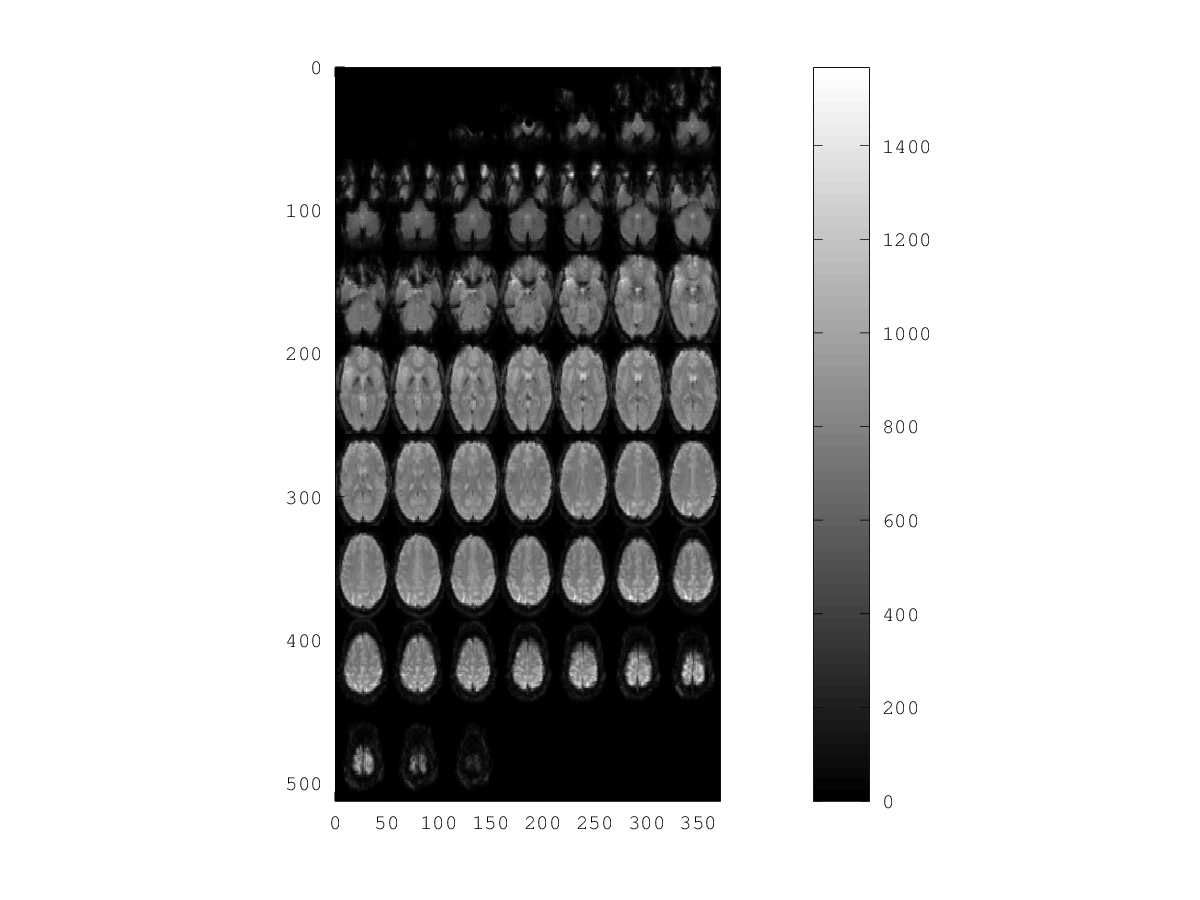

In [8]:
# Dispaly before correction image
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


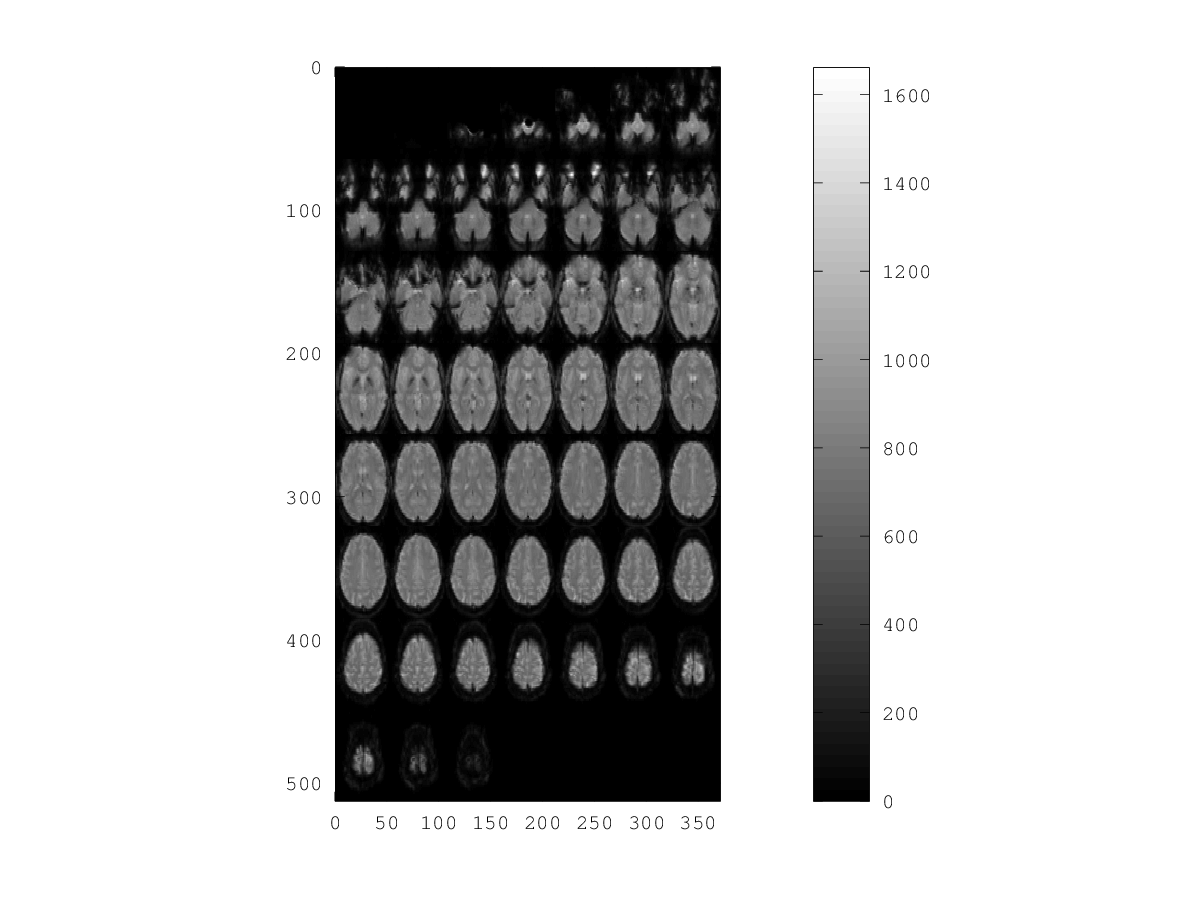

In [9]:
# After correction
niak_montage(vol,opt)

In [10]:
%% resample func to head mask
clear in out opt
niak_gb_vars
in.source =files_out.vol_nu;
in.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz'];
out = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_nu_resamp.nii.gz'];
opt.interpolation = 'nearest_neighbour';
#opt.flag_tfm_space = true;
niak_brick_resample_vol(in,out,opt);

Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013//func_HC0040013_mean_stereonl_nu.nii.gz to /tmp/niak_tmp_258096649_func_HC0040013_mean_stereonl_nu_resamp/source.mnc

 Reading source volume information /tmp/niak_tmp_258096649_func_HC0040013_mean_stereonl_nu_resamp/source.mnc ...

 Reading target volume information /home/yassinebha/git/niak//template/mni-models_icbm152-nl-2009-1.0/mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz ...

 Resampling source on target ...
Transforming slices:.............................................................................................................................................................................................Done
Cleaning temporary files
Done!
Copying or converting file /tmp/niak_tmp_258096649_func_HC0040013_mean_stereonl_nu_resamp/resample.mnc to /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_nu_resamp.nii.gz
Deleting 

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


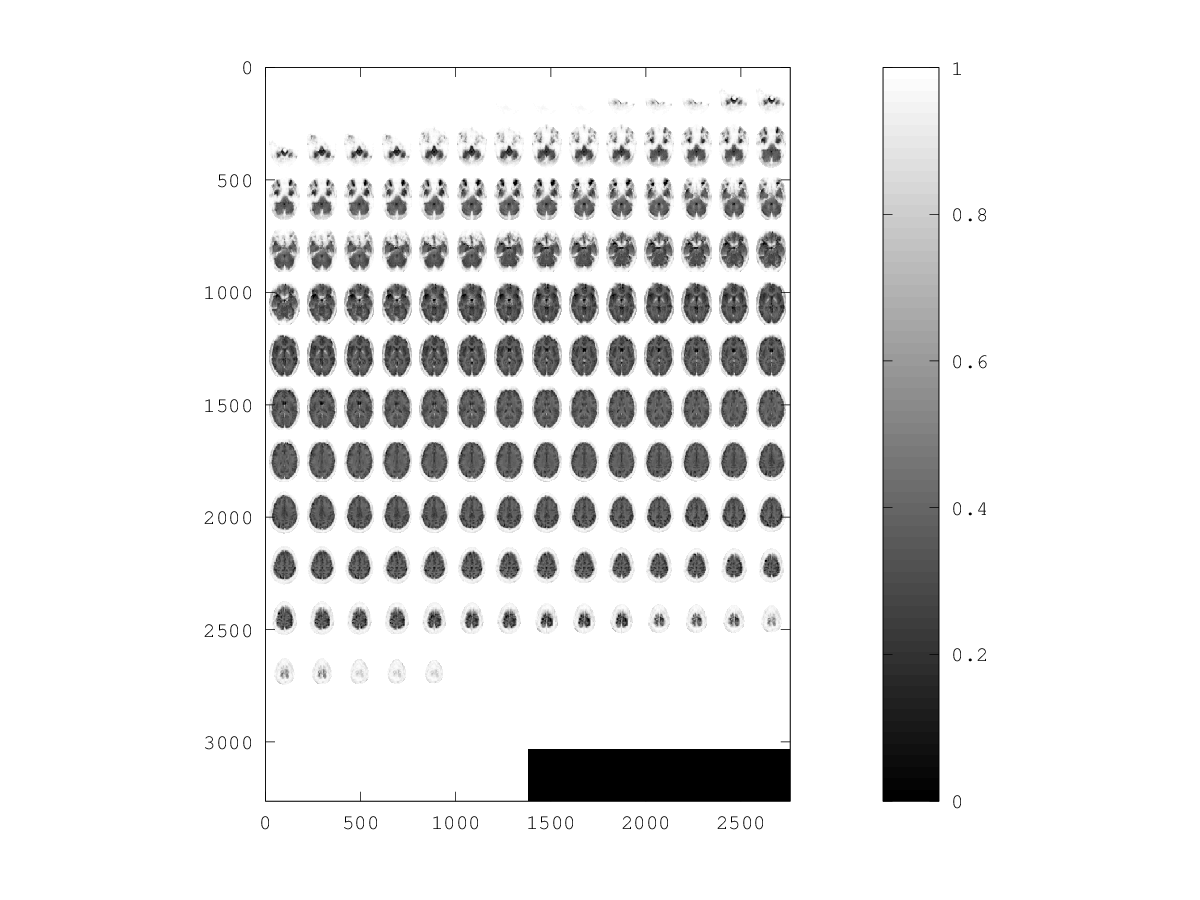

In [11]:
%% Invert contrast
[hdr,vol] = niak_read_vol(out);
[hdr,mask] = niak_read_vol(in.target);
param.perc_min = 0.001;
param.perc_max = 0.999;

mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
hdr.file_name =  [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.nii.gz'];
niak_write_vol(hdr,vol);

opt.type_color = 'gray';
niak_montage(vol,opt)

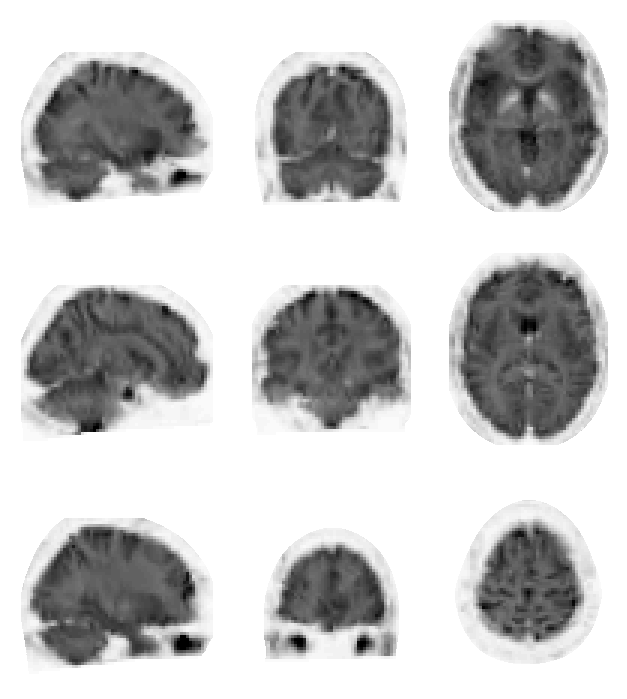

In [12]:
%% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

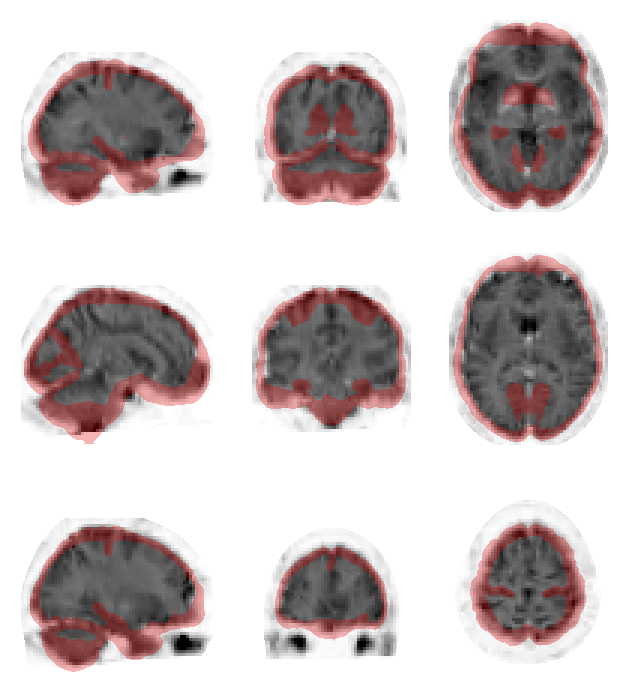

In [13]:
%% Add overlay 
clear jin jout jopt
jin.background =[path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_inv.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv_outline.png'];
jopt.transparency = 0.7 ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

## XP result

Brain head in the func is very fade. still having blinking effect when swithcing between func and anat

**Pierre an I suggestion: **
- Extract function brain and invert contrast and make background white 
- Add the anatomical headmask in the same functional image means we will have a functional volume wile its brain boirder are its anatomial one

**conclusion: **

Next XP build the funcitonal image, without surrounding head tissues, build the anatomical image, generate a binary mask of pixels that are pure white pixels in the func image, replace by pixels for the anatomical imagethe functional image with anatomical head mask